<a href="https://colab.research.google.com/github/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo2/desafios/Desafio_aula6_modulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Pre-analise

---
## 1.1) Funções de apoio
---

---

---
## 1.2) Bibliotecas utilizadas

* searborn
* pandas
* matplotlib
* datatime
---

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# pandas configuracao
pd.options.display.float_format  ="{:,.2f}".format

---

---
## 1.3) Preparação dos dados 
---

In [ ]:
uri = "https://raw.githubusercontent.com/HenriqueCCdA/bootCampAluraDataScience/master/modulo2/desafios/mensal_aberto.csv"

mensal_aberto = pd.read_csv(uri, usecols=["mes", "uf", "gasto"])
mensal_aberto.columns = ["ano_mes_dia", "uf", "gasto"]

mensal_aberto.head()

,ano_mes_dia,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


In [ ]:
mensal_aberto["ano_mes_dia"] = mensal_aberto["ano_mes_dia"].astype('datetime64[ns]')

In [ ]:
mensal_aberto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ano_mes_dia  4050 non-null   datetime64[ns]
 1   uf           4050 non-null   object        
 2   gasto        4050 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 95.0+ KB


In [ ]:
dias_por_mes ={ 1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30,
                7: 31, 8: 30, 9: 30,10: 31,11: 30,12: 31}

In [ ]:
mensal_aberto['mes'] = mensal_aberto['ano_mes_dia'].dt.month
mensal_aberto['ano'] = mensal_aberto['ano_mes_dia'].dt.year
mensal_aberto['diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)
estado_a_analisar = mensal_aberto.query("uf == 'São Paulo'")
gastos_por_ano = estado_a_analisar.groupby("ano").sum()
gastos_por_ano.head()

,gasto,mes,diario
ano,,,
2008,"1,960.23",77,64.79
2009,"2,489.03",78,82.05
2010,"2,696.62",78,88.89
2011,"2,794.55",78,92.17
2012,"2,873.97",78,94.74


# 2) Desafios

---
## 2.1) Desafio 01: Reordenar as cores pelo valor do eixo y.
---



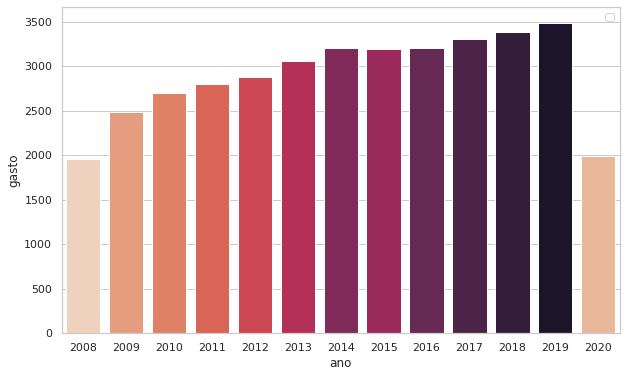

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", hue="gasto", dodge=False, palette=sns.color_palette("rocket_r", 13))
plt.legend('')